# Initial Analysis - Proposal

In [214]:
import pandas as pd
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pylab

## Load the graph data

In [109]:
articles = pd.read_table("data/graph/articles.tsv", skiprows=11, names=["article"])

print(articles["article"].is_unique)

articles.head(2)

True


,article
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,%C3%85land


In [37]:
categories = pd.read_csv(
    "data/graph/categories.tsv", skiprows=12, sep="\t", names=["article", "category"]
)
categories.head(2)

,article,category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures


In [44]:
links = pd.read_csv(
    "data/graph/links.tsv", skiprows=11, sep="\t", names=["article1", "article2"]
)
links.tail(2)

,article1,article2
119880,Zulu,Zambia
119881,Zulu,Zimbabwe


In [39]:
paths_finished = pd.read_csv("data/graph/paths_finished.tsv")

## Analyzing the data

In [148]:
wiki_graph = pd.DataFrame(columns=["article", "category", "links", "links_count"])

wiki_graph["article"] = articles["article"]

wiki_graph["links"] = [list() for x in range(len(wiki_graph.index))]
wiki_graph["links_count"] = [0 for x in range(len(wiki_graph.index))]

grouped_categories = categories.groupby("article")
for entry in grouped_categories:
    article_name = entry[0]
    cats_df = entry[1]["category"]
    cats_list = cats_df.values.tolist()
    
    indices = wiki_graph.index[wiki_graph["article"] == article_name].tolist()
    for i in indices:
        wiki_graph.at[i, "category"] = cats_list

groyped_links = links.groupby("article1")
for entry in groyped_links:
    article_name = entry[0]
    links_df = entry[1]["article2"]
    links_list = links_df.values.tolist()

    indices = wiki_graph.index[wiki_graph["article"] == article_name].tolist()
    for i in indices:
        wiki_graph.at[i, "links"] = links_list
        wiki_graph.at[i, "links_count"] = len(links_list)

wiki_graph.tail()

,article,category,links,links_count
4599,Zionism,"[subject.People.Political_People, subject.Reli...","[18th_century, 19th_century, Adolf_Hitler, Alb...",74
4600,Zirconium,[subject.Science.Chemistry.Chemical_elements],"[Aluminium, Arabic_language, Australia, Bicycl...",42
4601,Zoroaster,[subject.People.Religious_figures_and_leaders],"[18th_century, 9th_century, Afghanistan, Age_o...",28
4602,Zuid-Gelders,"[subject.Geography.European_Geography, subject...","[Brabantian, Dutch_language, East_Flemish, Hol...",5
4603,Zulu,[subject.Geography.African_Geography],"[AK-47, Bantu, Cape_Town, Christianity, Englis...",15


In [117]:
print(wiki_graph["article"].is_unique)
print(len(wiki_graph))
print(wiki_graph.shape[0])
print(wiki_graph.shape[1])

True
4604
4604
4


## Visualizations

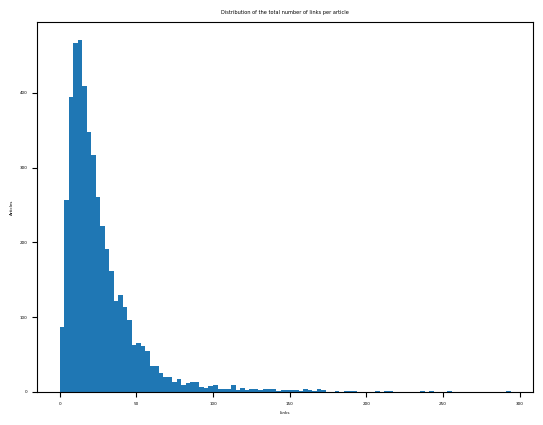

In [212]:
links_counts = wiki_graph["links_count"].values

plt.hist(links_counts, bins = 100)
plt.title("Distribution of the total number of links per article")
plt.xlabel("Links")
plt.ylabel("Articles")
plt.show()


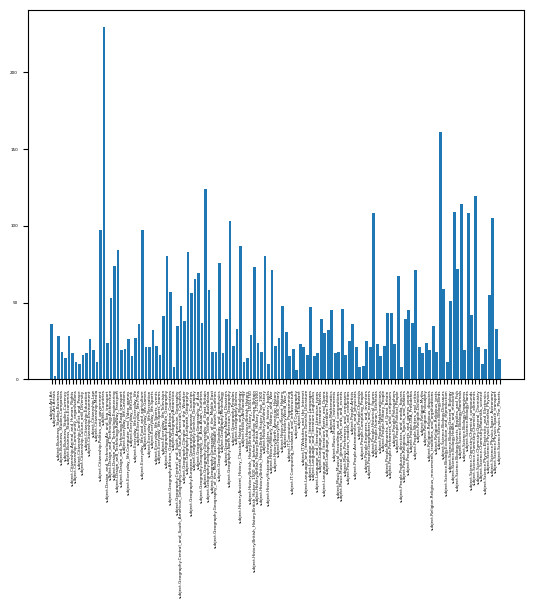

In [211]:
groups = categories.groupby("category").count()
labels = list(groups.index)
values = list(groups["article"])

X_axis = np.arange(len(labels))

plt.rcParams['font.size'] = '3'

plt.xticks(rotation=90)
#plt.xticks(X_axis, labels, labelsize=10)
plt.bar(labels,values)
plt.show()


## NetworkX

In [215]:
def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

In [168]:
def sort_dict_by_value(dict):
    return sorted(dict.items(), key=lambda x: x[1], reverse=True)

1301
2469


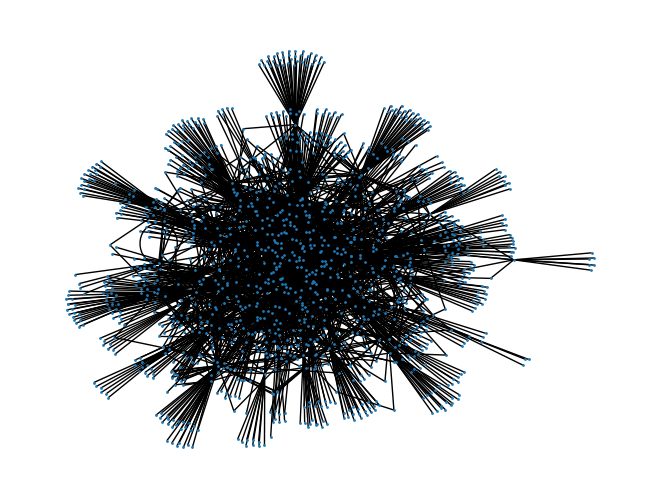

In [230]:
G=nx.Graph()

sampled_wiki_graph = wiki_graph.sample(100, replace=False)

for ind in sampled_wiki_graph.index:
    node_name = wiki_graph["article"][ind]
    node_links = wiki_graph["links"][ind]
    for l in node_links:
        G.add_edge(node_name, l)

print(G.number_of_nodes())
print(G.number_of_edges())

nx.draw(G,with_labels=False,node_size=1)
plt.draw()
plt.savefig("wikispeedia_graph.pdf")


In [178]:
# graph analytics
pagerankDict = nx.pagerank(G, alpha=0.9)

topN = 10
top_tuples = sort_dict_by_value(pagerankDict)[:topN]
#print(top_tuples[0][0])

In [180]:
nx.density(G)

0.0028461091605256716